<h3>Tugas Convolution dan Correlation PCD</h3>
Nama: Raditya Sebastian<br>
NIM : 1306620042<br>

<h2>Pertanyaan</h2>
1.) Buktikan bahwa Konvolusi sama dengan korelasi yang kernelnya di pusat 180 degree?<br>
2.) Buat Skript perhitungan konvolusi secara langsung, dan konvolusi dengan transformasi Fourier?<br>
3.) Hitunglah waktu running untuk masing-masing proses konvolusi?

<h2>Library yang digunakan</h2>

In [70]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import signal


<h2>Fungsi yang mengrotasikan matrix 180 derajat</h2>

In [71]:
N = 3;
 
# Function to Rotate
# the matrix by 180 degree
def rotateMatrix(mat):
     
    # Simply print from
    # last cell to first cell.
    i = N - 1;
    while(i >= 0):
        j = N - 1;
        while(j >= 0):
            print(mat[i][j], end = " ");
            j = j - 1;
        print();
        i = i - 1;
    return mat


<h2>Jawaban No.1</h2>

untuk menjawab pertanyaan ini saya membuat dua skenario saat kernel normal dan saat kernel 180 degree
kernel yang digunakan adalah kernel edge detection yaitu,<br>
$$
\left[\begin{array}{cc} 
-1 & -1 & -1\\
-1 & -8 & -1\\
-1 & -1 & -1
\end{array}\right]
$$

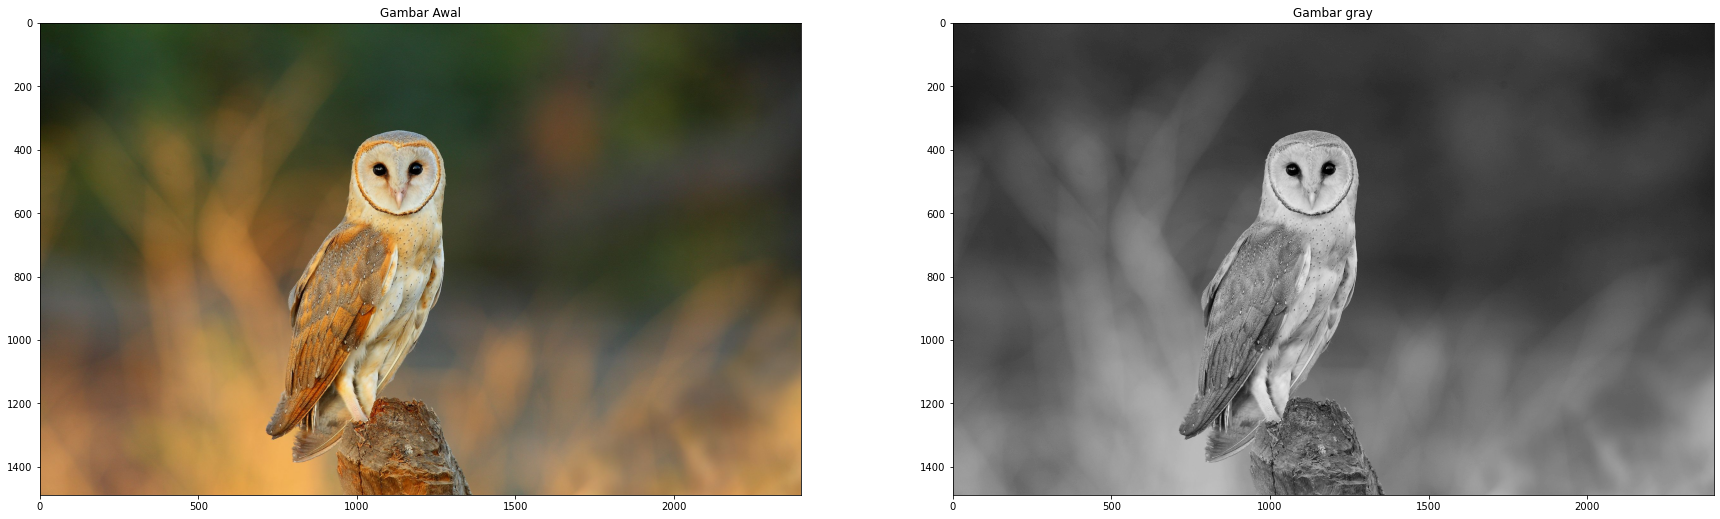

In [72]:
#Reading the picture
img = cv.imread('Barn_Owl.jpg')
#converting bgr to rgb
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
pixels = np.array(image)
gray = cv.cvtColor(pixels, cv.COLOR_RGB2GRAY)
#showing a picture
plt.figure(figsize=(30,30))
plt.subplot(221)
plt.title('Gambar Awal')
plt.imshow(pixels)
plt.subplot(222)
plt.title('Gambar gray')
plt.imshow(gray,cmap='gray',vmin=0,vmax=255)


In [73]:
kernel = np.array(([-1,-1,-1],[-1,8,-1],[-1,-1,-1]))
#Rotasi
kernel_rotate180 = rotateMatrix(kernel.copy())


-1 -1 -1 
-1 8 -1 
-1 -1 -1 


In [74]:
convolution = signal.convolve2d(gray,kernel)
convolution_180 = signal.convolve2d(gray,kernel_rotate180)
correlation = signal.correlate2d(gray,kernel)
correlation_180 = signal.correlate2d(gray,kernel_rotate180)


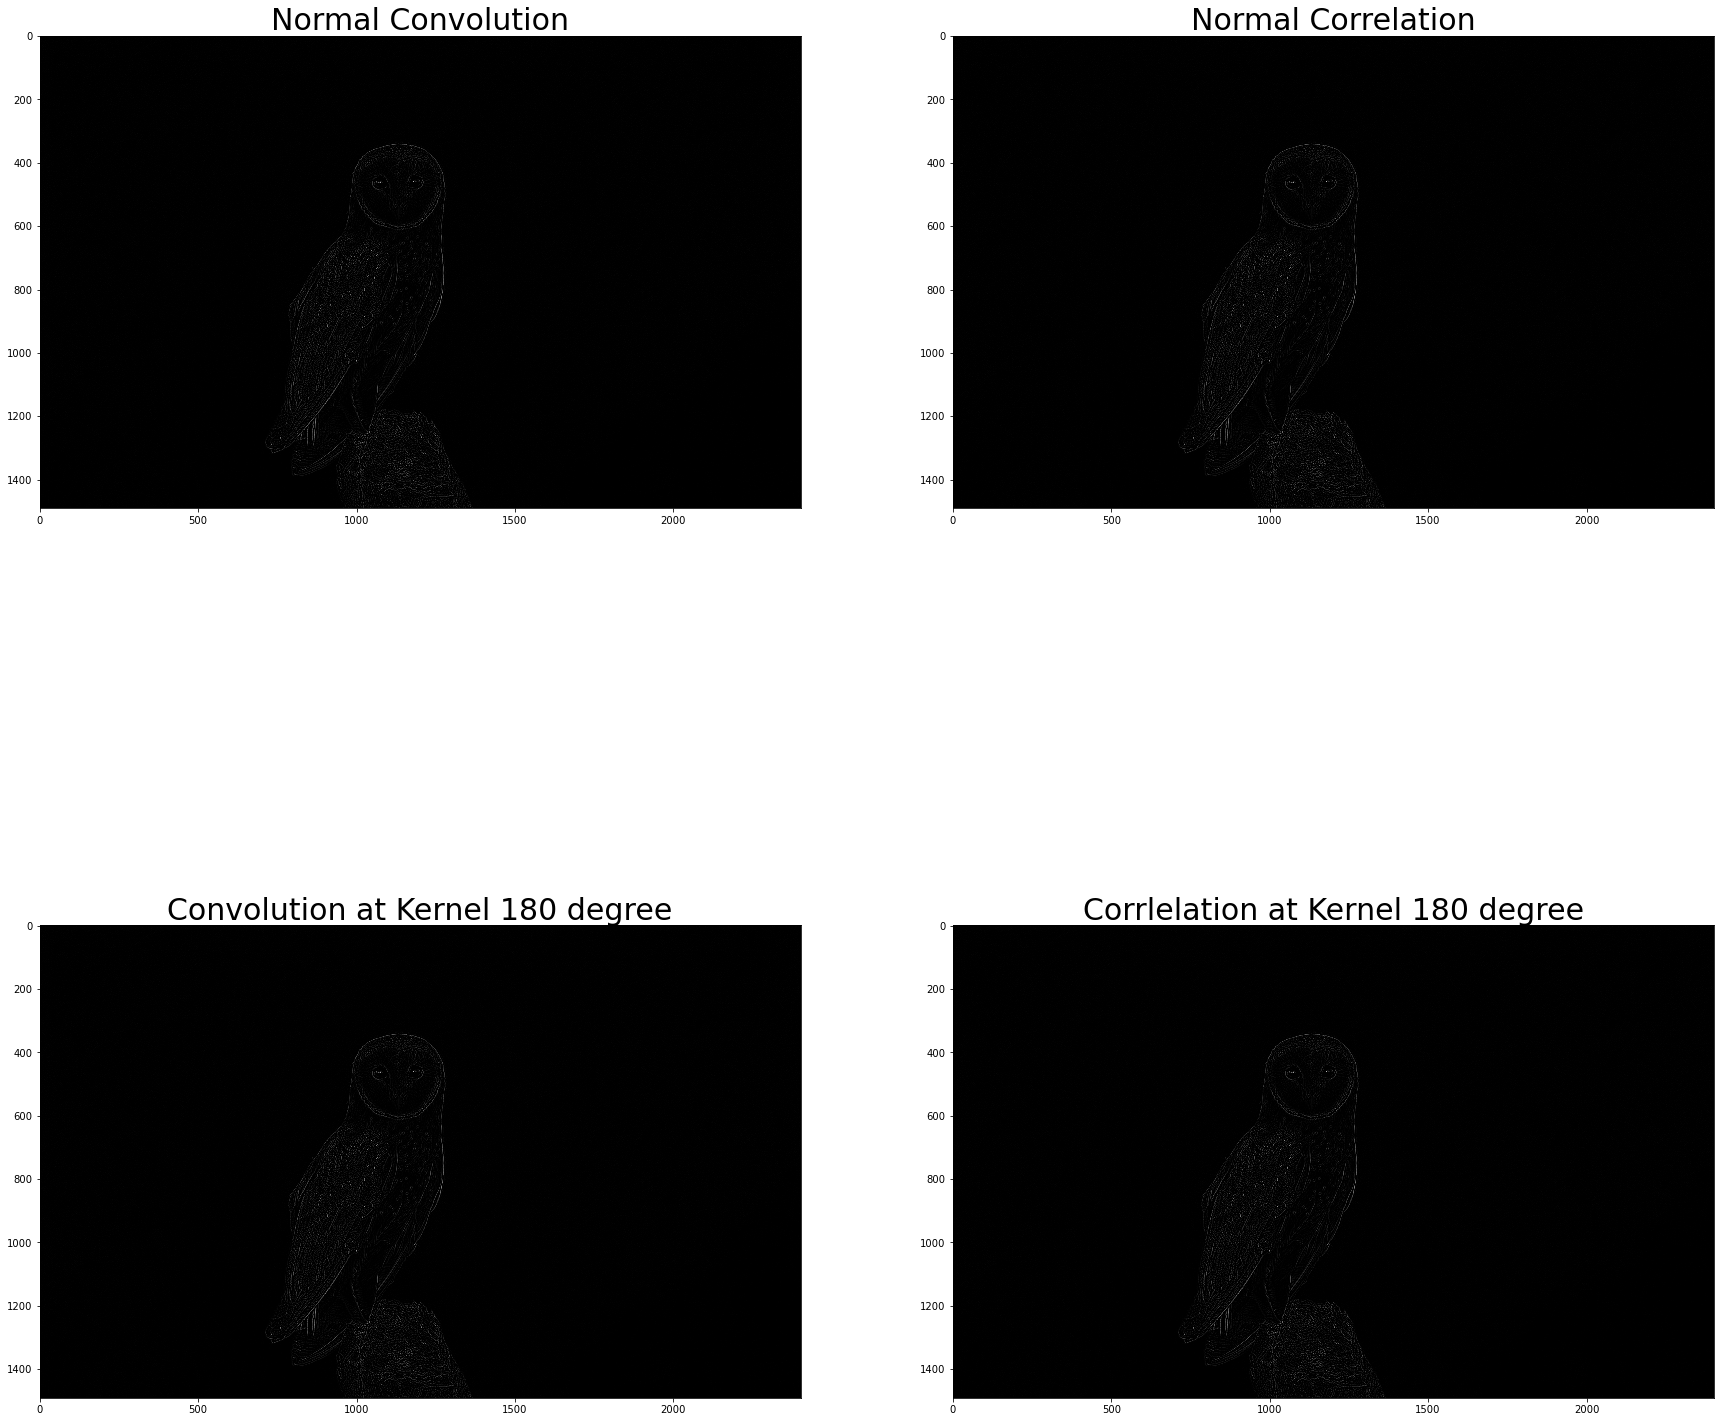

In [81]:
plt.figure(figsize=(30,30))
plt.subplot(221)
plt.title('Normal Convolution',fontsize=30)
plt.imshow(convolution,cmap='gray',vmin=0,vmax=255)
plt.subplot(222)
plt.title('Normal Correlation',fontsize=30)
plt.imshow(correlation,cmap='gray',vmin=0,vmax=255)
plt.subplot(223)
plt.title('Convolution at Kernel 180 degree',fontsize=30)
plt.imshow(convolution_180,cmap='gray',vmin=0,vmax=255)
plt.subplot(224)
plt.title('Corrlelation at Kernel 180 degree',fontsize=30)
plt.imshow(correlation_180,cmap='gray',vmin=0,vmax=255)

<h3>Jawaban No 2</h3>

Untuk No dua itu saya menggabungkan convolusi dan correlasi pada fft

In [76]:
#Konvolusi pada fft
fftConvole=signal.fftconvolve(gray,kernel)
fftConvole_180= signal.fftconvolve(gray,kernel_rotate180,)
#fft pada korrelasi
fftcorrelation = signal.correlate2d(fftConvole,kernel)
fftcorrelation_180 = signal.correlate2d(fftConvole_y,kernel_rotate180)

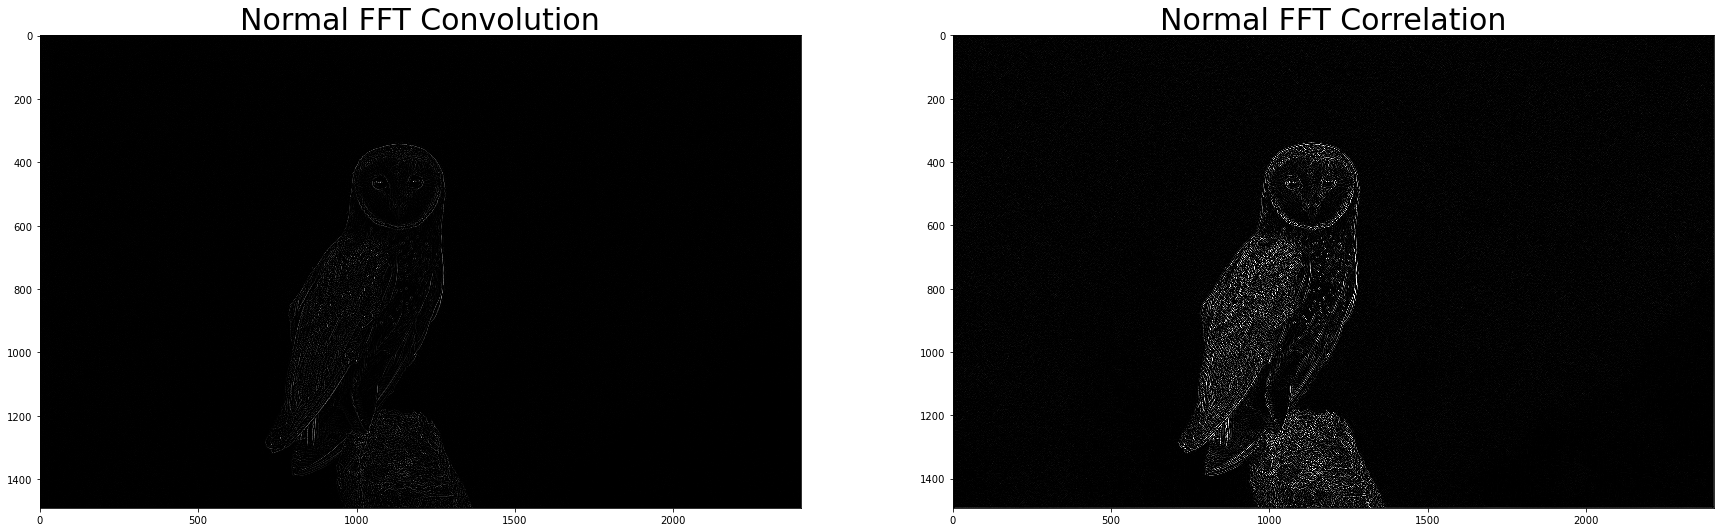

In [77]:
plt.figure(figsize=(30,30))
plt.subplot(321)
plt.title('Normal FFT Convolution',fontsize=30)
plt.imshow(fftConvole,cmap='gray',vmin=0,vmax=255)
plt.subplot(322)
plt.title('Normal FFT Correlation',fontsize=30)
plt.imshow(fftcorrelation,cmap='gray',vmin=0,vmax=255)

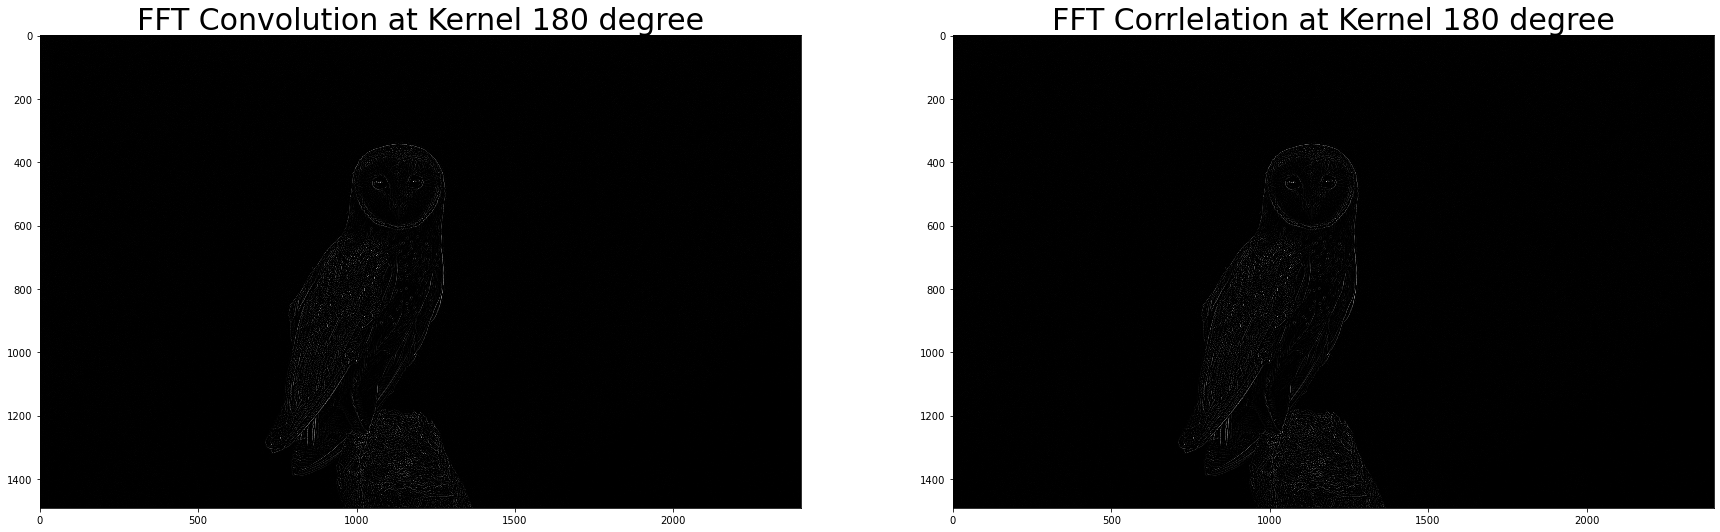

In [78]:
plt.figure(figsize=(30,30))
plt.subplot(121)
plt.title('FFT Convolution at Kernel 180 degree',fontsize=30)
plt.imshow(convolution_180,cmap='gray',vmin=0,vmax=255)
plt.subplot(122)
plt.title('FFT Corrlelation at Kernel 180 degree',fontsize=30)
plt.imshow(correlation_180,cmap='gray',vmin=0,vmax=255)

<h2>Jawaban No 3</h2>

In [79]:
print('Time required for normal discrete convolution:')
%timeit convolution
print('Time required for FFT convolution:')
%timeit fftConvole
print('Time required for normal discrete convolution at 180 degree:')
%timeit convolution_180
print('Time required for FFT convolution at 180 degree:')
%timeit fftConvole_180


Time required for normal discrete convolution:
44.6 ns ± 6.99 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
Time required for FFT convolution:
37.5 ns ± 3.02 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
Time required for normal discrete convolution at 180 degree:
44.8 ns ± 3.56 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
Time required for FFT convolution at 180 degree:
53.4 ns ± 16.9 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [80]:
print('Time required for normal discrete Corrlelation:')
%timeit correlation
print('Time required for FFT Corrlelation:')
%timeit fftcorrelation
print('Time required for normal discrete Corrlelation at 180 degree:')
%timeit correlation_180
print('Time required for FFT Corrlelation at 180 degree:')
%timeit fftcorrelation_180


Time required for normal discrete Corrlelation:
49.2 ns ± 8.55 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
Time required for FFT Corrlelation:
55.2 ns ± 13.3 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
Time required for normal discrete Corrlelation at 180 degree:
31.6 ns ± 5.08 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
Time required for FFT Corrlelation at 180 degree:
33.7 ns ± 2.49 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


<h3>Referensi</h3>
file:///C:/Users/adit/Downloads/Sandipan%20Dey%20-%20Hands-On%20Image%20Processing%20with%20Python-Packt%20Publishing%20(2018).pdf<br>
https://www.geeksforgeeks.org/how-to-perform-faster-convolutions-using-fast-fourier-transformfft-in-python/<br>
https://www.geeksforgeeks.org/rotate-matrix-180-degree/